<a href="https://colab.research.google.com/github/seongheechoi/education/blob/main/A2C_0730.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title
# Ïã§ÏäµÏùÑ ÏßÑÌñâÌïòÍ∏∞ Ï†ÑÏóê Î≥∏ ÏΩîÎìúÎ•º Ïã§ÌñâÏãúÏºúÏÑú ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÑ§Ïπò
!pip install numpy==1.23.5
!pip install gym==0.25.2
!pip install matplotlib
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23.2/23.2 MB 96.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 875.6/875.6 kB 51.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.1/13.1 MB 80.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 663.9/663.9 MB 2.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 417.9/417.9 MB 2.8 MB/s eta 0:00:00
  

## Î™®Îìà Ìò∏Ï∂ú

In [2]:
import gym
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
import matplotlib.pyplot as plt
import numpy as np

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cuda:0


# A2C ÏïåÍ≥†Î¶¨Ï¶ò Íµ¨ÌòÑ


1.   Ï†ïÏ±Ö(Policy) Î∞è ÎπÑÌèâÍ∞Ä(Critic)ÎÑ§Ìä∏ÏõåÌÅ¨ Íµ¨ÌòÑ

1.   ÌôòÍ≤Ω ÍµêÎ•ò Î∞è Trajectory ÏàòÏßë
  - Rollout ÏÉòÌîå Ï†ÄÏû•

2.   Episode Î∞òÌôò Í∞í Í≥ÑÏÇ∞

2.   Advantage Í∞í Í≥ÑÏÇ∞

2.   Î™©Ï†Å Ìï®ÏàòÎ•º ÌôúÏö©Ìïú Ï†ïÏ±Ö ÏóÖÎç∞Ïù¥Ìä∏

1.   Íµ¨ÌòÑ Í≤∞Í≥º Î∂ÑÏÑù

  - CartPole ÌôòÍ≤ΩÏóêÏÑúÏùò ÏÑ±Îä• Í≤ÄÏ¶ù

  - REINFORCEÏôÄÏùò ÏÑ±Îä• ÎπÑÍµê




## Actor-Critic Î™®Îç∏ ÏÑ†Ïñ∏

Actor-Critic ÌÅ¥ÎûòÏä§Î•º ÌôúÏö©ÌïòÏó¨ ActorÏôÄ Critic ÎÑ§Ìä∏ÏõåÌÅ¨Î•º Ìè¨Ìï®ÌïòÍ≥† ÏûàÎäî `Actor_Critic` ÎÑ§Ìä∏ÏõåÌÅ¨ Íµ¨ÏÑ±

`Actor_Critic`ÌÅ¥ÎûòÏä§Îäî `nn.Module`ÏùÑ ÏÉÅÏÜçÎ∞õÏùåÏúºÎ°úÏç® Îã§ÏùåÍ≥º Í∞ôÏùÄ Ïó≠Ìï†ÏùÑ ÏàòÌñâÌï®

1.   `nn.Module`ÏùÑ ÌôúÏö©ÌïòÏó¨ ÎÑ§Ìä∏ÏõåÌÅ¨Ïùò Î™®Îì† ÌååÎùºÎØ∏ÌÑ∞(Í∞ÄÏ§ëÏπòÏôÄ Î∞îÏù¥Ïñ¥Ïä§)Î•º ÏûêÎèôÏúºÎ°ú Ï∂îÏ†Å
  - `nn.Parameter`Î•º ÌôúÏö©ÌïòÏó¨ ÎÑ§Ìä∏ÏõåÌÅ¨ Îß§Í∞úÎ≥ÄÏàòÎ•º ÌïúÎ≤àÏóê Í¥ÄÎ¶¨ Í∞ÄÎä•
2.   `forward` Î©îÏÜåÎìúÏùÑ ÌôúÏö©ÌïòÏó¨ ÎÑ§Ìä∏ÏõåÌÅ¨Ïùò ÏûÖÏ∂úÎ†•ÏùÑ Í¥ÄÎ¶¨

3.   PyTorchÎ•º ÌôúÏö©ÌïòÏó¨ ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÌÜµÌï¥ Ï†ÑÌååÎêòÎäî Î™®ÎìàÎì§Ïóê ÎåÄÌï¥ ÏûêÎèôÏ†ÅÏúºÎ°ú ÎØ∏Î∂ÑÏùÑ Í≥ÑÏÇ∞Ìï† Ïàò ÏûàÏùå


In [3]:
################################## ÏΩîÎìú ÏûëÏÑ± ###################################

# Actor_Critic classÎ•º ÏÑ†Ïñ∏ÌïòÍ≥†, nn.ModuleÏùÑ ÏÉÅÏÜçÎ∞õÏùå
class Actor_Critic(nn.Module):
    def __init__(self,
                 obs_dim,
                 act_dim,
                 ):
        super(Actor_Critic, self).__init__()
        # ÌôòÍ≤ΩÏùò ÏÉÅÌÉú Î∞è ÌñâÎèô Ï∞®ÏõêÏùÑ Î≥ÄÏàòÎ°ú Ï†ÄÏû•
        self.obs_dim=obs_dim
        self.act_dim=act_dim

        # Actor Î∞è Critic ÎÑ§Ìä∏ÏõåÌÅ¨Î•º Î≥ÄÏàòÎ°ú ÏÑ†Ïñ∏

        # ÏÉÅÌÉúÎ•º ÏûÖÎ†•ÏúºÎ°ú, actionÏùò Í∞úÏàò(action dimension)ÎßåÌÅº Ï∂úÎ†•
        self.policy_net = nn.Sequential(
            nn.Linear(obs_dim, 128),
            nn.ReLU(),
            nn.Linear(128, act_dim),
        )

        # ÏÉÅÌÉúÎ•º ÏûÖÎ†•ÏúºÎ°ú, ÌäπÏ†ï Í∞íÏùÑ Ï∂úÎ†•
        self.value_net = nn.Sequential(
            nn.Linear(obs_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
        )

    # `forward` Î©îÏÜåÎìúÎ•º ÌôúÏö©ÌïòÏó¨ policy_logitÍ≥º Í∞ÄÏπò ÏòàÏ∏° Í∞í Ï∂úÎ†•
    def forward(self, state):
        policy_logit = self.policy_net(state)
        value = self.value_net(state)

        return policy_logit, value

################################################################################


Ìï®Ïàò `def __init__(self, obs_dim, act_dim)`Î•º ÌôúÏö©Ìïú Í∞ùÏ≤¥ Ï¥àÍ∏∞Ìôî
 - `self` : Í∞ùÏ≤¥ Ïä§Ïä§Î°úÎ•º Ï∞∏Ï°∞Ìï† Ïàò ÏûàÏùå. Í∞ùÏ≤¥ ÎÇ¥ Î™®Îì† Î≥ÄÏàòÏóê Ï†ëÍ∑º Í∞ÄÎä•
 (ÏïÑÎ¨¥Í≤ÉÎèÑ ÏûÖÎ†•ÌïòÏßÄ ÏïäÏïÑÎèÑ defaultÎ°ú Ï∂îÍ∞ÄÎê®)
 - `obs_dim` : ÎÑ§Ìä∏ÏõåÌÅ¨ Íµ¨ÏÑ±ÏùÑ ÏúÑÌïú Í¥ÄÏ∏° Ï∞®Ïõê ÏûÖÎ†•
 - `act_dim` : ÎÑ§Ìä∏ÏõåÌÅ¨ Íµ¨ÏÑ±ÏùÑ ÏúÑÌïú ÌñâÎèô Ï∞®Ïõê ÏûÖÎ†•

In [4]:
env_name = 'CartPole-v1'
env = gym.make(env_name, render_mode="rgb_array")
obs_dim = env.observation_space.shape[0]
n_action = env.action_space.n

actor_critic = Actor_Critic(
    obs_dim = obs_dim,
    act_dim = n_action
    ).to(DEVICE)

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Class ÎÇ¥ ÏÑ†Ïñ∏Îêú Î≥ÄÏàòÎì§ÏùÄ `.`ÏùÑ ÌôúÏö©ÌïòÏó¨ Ìò∏Ï∂ú Í∞ÄÎä•

In [5]:
print("State dimension:", actor_critic.obs_dim)
print("Action dimension:", actor_critic.act_dim)
print("Value Network:", actor_critic.value_net)
print("Policy Network:", actor_critic.policy_net)

State dimension: 4
Action dimension: 2
Value Network: Sequential(
  (0): Linear(in_features=4, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=1, bias=True)
)
Policy Network: Sequential(
  (0): Linear(in_features=4, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=2, bias=True)
)


`Actor_Critic` ÌÅ¥ÎûòÏä§Ïùò ÌååÎùºÎØ∏ÌÑ∞ ÌôïÏù∏

In [6]:
print(actor_critic.parameters)

<bound method Module.parameters of Actor_Critic(
  (policy_net): Sequential(
    (0): Linear(in_features=4, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=2, bias=True)
  )
  (value_net): Sequential(
    (0): Linear(in_features=4, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
  )
)>


ÎÑ§Ìä∏ÏõåÌÅ¨ forward ÏàòÌñâÎ•º ÏàòÌñâÌï®ÏúºÎ°úÏç® ÏûêÎèôÏ†ÅÏúºÎ°ú ÎØ∏Î∂Ñ Ïó∞ÏÇ∞ ÏàòÌñâ
 - Ïó≠Ï†ÑÌåå(backpropagation) Í≥ºÏ†ïÏóêÏÑú `grad_fn`Ïóê Îî∞Îùº ÎØ∏Î∂ÑÏù¥ ÏàòÌñâÎê®

 - `policy_logit`Í≥º `value`Îäî `actor_critic` Î™®Îç∏Ïùò `forward` Î©îÏÜåÎìúÎ•º ÌÜµÌï¥ Í≥ÑÏÇ∞ÎêòÎ©∞, Î©îÏÜåÎìú ÎÇ¥ ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÌÜµÍ≥ºÌïòÎ©∞ Ïó∞ÏÇ∞Îêú Ï†ïÎ≥¥Î•º `grad_fn`ÏùÑ ÌÜµÌï¥ Í∞±Ïã†
 - ÎÑ§Ìä∏ÏõåÌÅ¨ÏóêÏÑú Ï†ÑÌååÎêú ÎØ∏Î∂ÑÍ∞íÎì§ÏùÄ Í∑∏ÎûòÌîÑ ÌòïÏãùÏùÑ ÌôúÏö©ÌïòÏó¨ ÏßÄÏÜçÏ†ÅÏúºÎ°ú Ïó∞Í≤∞Îê®

In [7]:
random_observation = torch.randn(1, 4)

# forward Î©îÏÜåÎìú Ìò∏Ï∂ú

l1 = nn.Linear(4, 2)
l2 = nn.ReLU()
l3 = nn.Linear(2, 1)

print("Random Observation:", random_observation)
l1_output = l1(random_observation)
print("Linear:", l1_output)
l2_output = l2(l1_output)
print("ReLU:", l2_output)
l3_output = l3(l2_output)
print("Linear:", l3_output)

Random Observation: tensor([[-0.8701,  0.0822, -0.2196,  1.1385]])
Linear: tensor([[-0.7155, -0.5207]], grad_fn=<AddmmBackward0>)
ReLU: tensor([[0., 0.]], grad_fn=<ReluBackward0>)
Linear: tensor([[-0.4673]], grad_fn=<AddmmBackward0>)


In [8]:
model = nn.Sequential()
model.add_module('W0', nn.Linear(4, 2))
model.add_module('relu', nn.ReLU())
model.add_module('W1', nn.Linear(16, 1))

`detach()` Î©îÏÜåÎìúÎ•º ÌôúÏö©ÌïòÏó¨ `grad_fn` Î∂ÑÎ¶¨
  - ÏµúÏ†ÅÌôî Í≥ºÏ†ïÏóêÏÑú ÎØ∏Î∂Ñ Ïó∞ÏÇ∞Ïóê Í¥ÄÏó¨ÌïòÍ≥† Ïã∂ÏßÄ ÏïäÏùÄ Î≥ÄÏàòÏóê ÎåÄÌïòÏó¨, `grad_fn`ÏùÑ Î∂ÑÎ¶¨
  - `grad_fn`Ïù¥ Î∂ÑÎ¶¨Îêú Î≥ÄÏàòÎäî ÏµúÏ†ÅÌôî Í≥ºÏ†ïÏóêÏÑú ÏÉÅÏàòÏùò Ïó≠Ìï†ÏùÑ ÏàòÌñâ

In [9]:
l1_output = l1_output.detach()
l2_output = l2_output.detach()
l3_output = l3_output.detach()

print("l1_output:", l1_output)
print("l2_output:", l2_output)
print("l3_output:", l3_output)

l1_output: tensor([[-0.7155, -0.5207]])
l2_output: tensor([[0., 0.]])
l3_output: tensor([[-0.4673]])


## ÏÉÅÌÉúÏóê Îî∞Îùº ÌñâÎèô ÏÑ†ÌÉù

/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

State :
[0.01062665 0.03481367 0.0279336  0.03676554]
Action :
1
Next State :
[ 0.01132292  0.22952415  0.02866891 -0.24697483]
Reward :
1.0
Done :
False


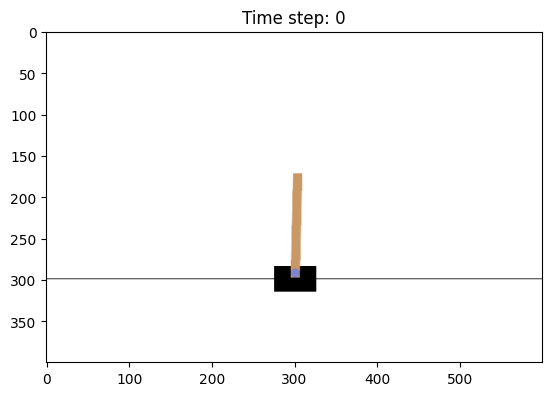

State :
tensor([ 0.0113,  0.2295,  0.0287, -0.2470], device='cuda:0')
Action :
0
Next State :
[0.0159134  0.03400473 0.02372942 0.0546113 ]
Reward :
1.0
Done :
False


State :
tensor([0.0159, 0.0340, 0.0237, 0.0546], device='cuda:0')
Action :
1
Next State :
[ 0.0165935   0.22877854  0.02482164 -0.23049137]
Reward :
1.0
Done :
False


State :
tensor([ 0.0166,  0.2288,  0.0248, -0.2305], device='cuda:0')
Action :
1
Next State :
[ 0.02116907  0.42353716  0.02021181 -0.5152425 ]
Reward :
1.0
Done :
False


State :
tensor([ 0.0212,  0.4235,  0.0202, -0.5152], device='cuda:0')
Action :
1
Next State :
[ 0.02963981  0.61836874  0.00990696 -0.8014883 ]
Reward :
1.0
Done :
False


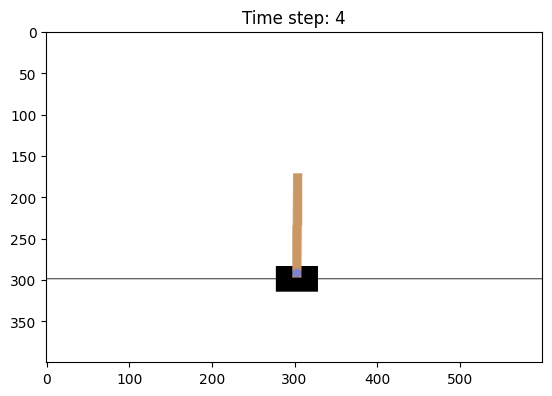

State :
tensor([ 0.0296,  0.6184,  0.0099, -0.8015], device='cuda:0')
Action :
1
Next State :
[ 0.04200719  0.8133534  -0.0061228  -1.0910383 ]
Reward :
1.0
Done :
False


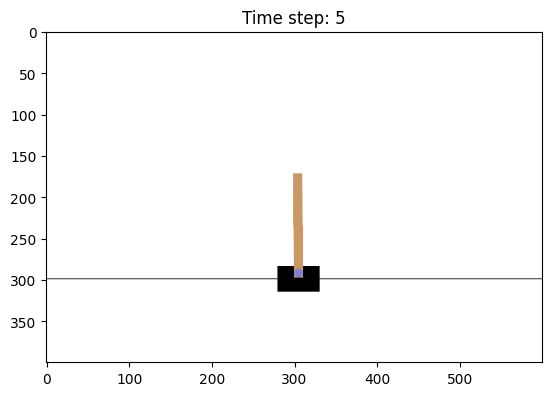

State :
tensor([ 0.0420,  0.8134, -0.0061, -1.0910], device='cuda:0')
Action :
1
Next State :
[ 0.05827426  1.0085555  -0.02794357 -1.3856362 ]
Reward :
1.0
Done :
False


State :
tensor([ 0.0583,  1.0086, -0.0279, -1.3856], device='cuda:0')
Action :
0
Next State :
[ 0.07844537  0.81379294 -0.05565629 -1.1018206 ]
Reward :
1.0
Done :
False


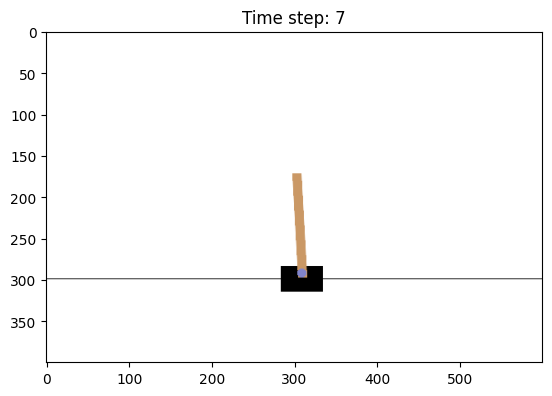

State :
tensor([ 0.0784,  0.8138, -0.0557, -1.1018], device='cuda:0')
Action :
1
Next State :
[ 0.09472123  1.0096012  -0.0776927  -1.4114327 ]
Reward :
1.0
Done :
False


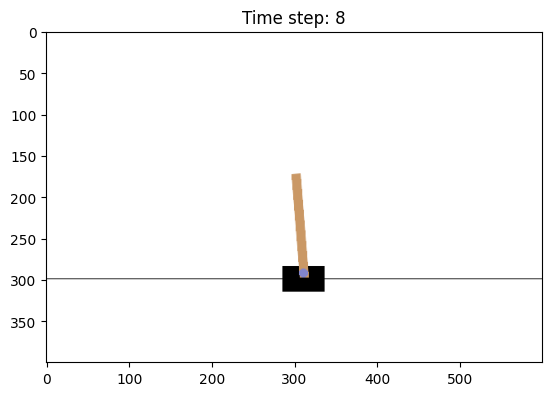

State :
tensor([ 0.0947,  1.0096, -0.0777, -1.4114], device='cuda:0')
Action :
0
Next State :
[ 0.11491325  0.8155237  -0.10592136 -1.1440134 ]
Reward :
1.0
Done :
False


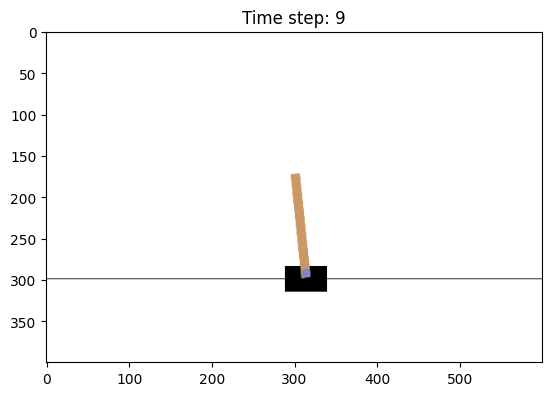

State :
tensor([ 0.1149,  0.8155, -0.1059, -1.1440], device='cuda:0')
Action :
0
Next State :
[ 0.13122372  0.6219328  -0.12880163 -0.88633716]
Reward :
1.0
Done :
False


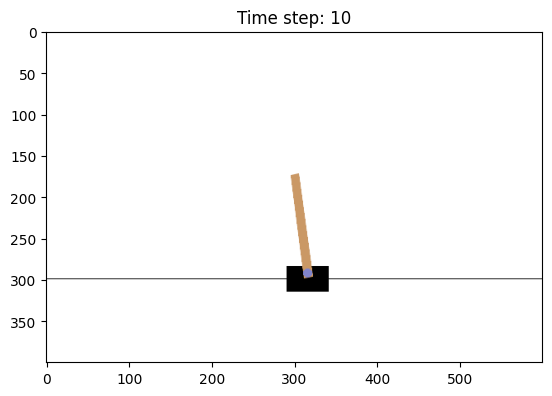

State :
tensor([ 0.1312,  0.6219, -0.1288, -0.8863], device='cuda:0')
Action :
0
Next State :
[ 0.14366238  0.42877245 -0.14652836 -0.6367597 ]
Reward :
1.0
Done :
False


State :
tensor([ 0.1437,  0.4288, -0.1465, -0.6368], device='cuda:0')
Action :
0
Next State :
[ 0.15223783  0.23596495 -0.15926357 -0.39357305]
Reward :
1.0
Done :
False


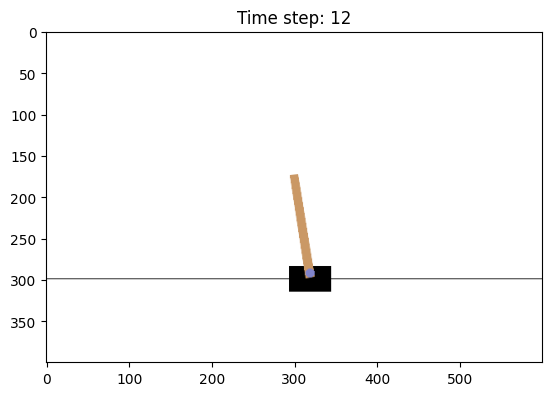

State :
tensor([ 0.1522,  0.2360, -0.1593, -0.3936], device='cuda:0')
Action :
1
Next State :
[ 0.15695713  0.4329461  -0.16713503 -0.73193115]
Reward :
1.0
Done :
False


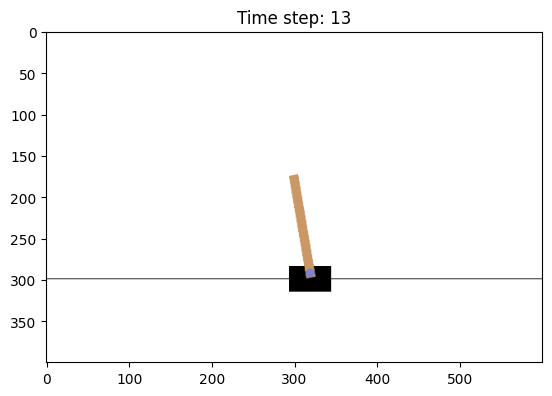

State :
tensor([ 0.1570,  0.4329, -0.1671, -0.7319], device='cuda:0')
Action :
1
Next State :
[ 0.16561605  0.6299347  -0.18177365 -1.072206  ]
Reward :
1.0
Done :
False


State :
tensor([ 0.1656,  0.6299, -0.1818, -1.0722], device='cuda:0')
Action :
0
Next State :
[ 0.17821474  0.43761975 -0.20321777 -0.8416338 ]
Reward :
1.0
Done :
False


State :
tensor([ 0.1782,  0.4376, -0.2032, -0.8416], device='cuda:0')
Action :
0
Next State :
[ 0.18696713  0.245765   -0.22005044 -0.6191092 ]
Reward :
1.0
Done :
True


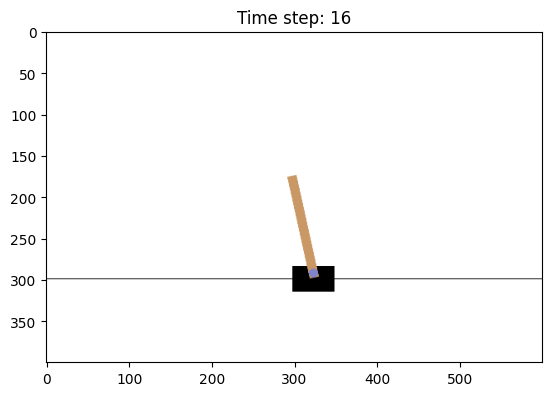

Total rewards : 17


In [10]:
done = False
obs = env.reset()

actions, states, rewards = [], [], []

total_rewards = 0
step = 0
# ÏóêÌîºÏÜåÎìúÍ∞Ä ÎÅùÎÇ† ÎïåÍπåÏßÄ Î∞òÎ≥µ
while not done:
    # ÌôòÍ≤ΩÏóêÏÑú Î¨¥ÏûëÏúÑ ÌñâÎèô ÏÉòÌîåÎßÅ
    action = env.action_space.sample()
    next_obs, reward, done, _ = env.step(action)
    print("State :")
    print(obs)
    print("Action :")
    print(action)
    print("Next State :")
    print(next_obs)
    print("Reward :")
    print(reward)
    print("Done :")
    print(done)

    ############   For render  #############
    plt.imshow(env.render()[0])
    plt.title(f'Time step: {step}')
    plt.show()
    ########################################

    # Trajectory ÏÉòÌîå Ï†ÄÏû•
    action = torch.tensor(action, dtype=torch.int).to(DEVICE)
    actions.append(action)
    states.append(obs)
    rewards.append(reward)
    total_rewards += reward

    # Îã§Ïùå ÏÉÅÌÉúÎ°ú Ïù¥Îèô
    next_obs =  torch.tensor(next_obs, dtype=torch.float).to(DEVICE)
    obs = next_obs
    step += 1

print("Total rewards : %d"%total_rewards)

## Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÌôúÏö©Ìïú ÌñâÎèô ÏÑ†ÌÉù (Remind)

`torch.distributions.Categorical`

: Î≤îÏ£ºÌòï Î∂ÑÌè¨Î•º ÎÇòÌÉÄÎÇ¥Î©∞, Í∞ÅÍ∞ÅÏùò Ïπ¥ÌÖåÍ≥†Î¶¨(ÎòêÎäî ÌÅ¥ÎûòÏä§)Ïóê ÎåÄÌïú ÌôïÎ•†Ïóê Îî∞Îùº ÏÉòÌîåÎßÅ ÏûëÏóÖÏùÑ ÏàòÌñâ

In [11]:
import torch
from torch.distributions import Categorical

# ÌôïÎ•† Î≤°ÌÑ∞
probs = torch.tensor([0.2, 0.3, 0.5])  # 3Í∞úÏùò Ïπ¥ÌÖåÍ≥†Î¶¨Ïóê ÎåÄÌïú ÌôïÎ•†

# Categorical Î∂ÑÌè¨ Í∞ùÏ≤¥ ÏÉùÏÑ±
dist = Categorical(probs)

# ÌôïÎ•†Ïóê Îî∞Îùº ÏÉòÌîåÎßÅ ÏàòÌñâ
sample = dist.sample()

print("ÌôïÎ•† : ", end='')
print(probs)
print("ÌôïÎ•†Î∂ÑÌè¨ : ", end='')
print(dist)
print("ÏÉòÌîå Ï∂úÎ†• : ", end='')
print(sample)

ÌôïÎ•† : tensor([0.2000, 0.3000, 0.5000])
ÌôïÎ•†Î∂ÑÌè¨ : Categorical(probs: torch.Size([3]))
ÏÉòÌîå Ï∂úÎ†• : tensor(1)


In [12]:
# Î¨¥ÏûëÏúÑ ÏÉòÌîåÏùÑ 100Î≤à Ïã§Ìñâ
samples = []
for _ in range(100):
    samples.append(dist.sample().item())

# Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÎπàÎèÑÏàò Í≥ÑÏÇ∞
frequencies = [0, 0, 0]
for sample in samples:
    frequencies[sample] += 1

print("ÏÉòÌîå Î∞úÏÉù ÎπàÎèÑÏàò : ", end='')
print(frequencies)

sampled_prob = []
for freq in frequencies:
    sampled_prob.append(freq / 100.0)

print("Î∞úÏÉùÌïú ÏÉòÌîåÏùò ÌôïÎ•† : ", end='')
print(sampled_prob)

ÏÉòÌîå Î∞úÏÉù ÎπàÎèÑÏàò : [20, 23, 57]
Î∞úÏÉùÌïú ÏÉòÌîåÏùò ÌôïÎ•† : [0.2, 0.23, 0.57]


### Î≤îÏ£ºÌòï Î∂ÑÌè¨Î•º ÌôúÏö©Ìïú ÌñâÎèô ÏÑ†ÌÉù

1) Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÌôúÏö©ÌïòÏó¨ ÌñâÎèô ÌôïÎ•† Í≤∞Ï†ï


2) ÏòàÏ∏°Îêú ÌñâÎèô ÌôïÎ•†Ïóê Îî∞Îùº ÌñâÎèô ÏÑ†ÌÉù

In [13]:
obs = torch.tensor(env.reset(), dtype=torch.float).to(DEVICE)

logits = actor_critic.policy_net(obs)
probs = F.softmax(logits, dim=-1)
dist = torch.distributions.Categorical(logits=logits)
action = dist.sample().item()

print("State : ", end='')
print(obs)
print("Logit : ", end='')
print(logits)
print("Probability : ", end='')
print(probs)
print("Distribution : ", end='')
print(dist)
print("Action : ", end='')
print(action)

State : tensor([-0.0158, -0.0254, -0.0223,  0.0312], device='cuda:0')
Logit : tensor([-0.1414, -0.0804], device='cuda:0', grad_fn=<ViewBackward0>)
Probability : tensor([0.4848, 0.5152], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Distribution : Categorical(probs: torch.Size([2]), logits: torch.Size([2]))
Action : 0


ÌñâÎèô ÏÑ†ÌÉù Í≥ºÏ†ïÏùÑ Ìï®ÏàòÌôî(`action_decide`)
 - ÏûÖÎ†•Î≥ÄÏàò : Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨, Í¥ÄÏ∏°(ÏÉÅÌÉú) Îç∞Ïù¥ÌÑ∞(`obs`)
 - Ï∂úÎ†• Í∞í : ÏÉòÌîåÎßÅÎêú ÌñâÎèô(`action`)
 - Ïó≠Ìï† : ÏûÖÎ†• Î∞õÏùÄ Í¥ÄÏ∏° Îç∞Ïù¥ÌÑ∞Î•º Î∞îÌÉïÏúºÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÌôúÏö©Ìï¥ Í∞ÄÏπòÎ•º ÌåêÎã®ÌïòÍ≥†, ÌôïÎ•† Î∂ÑÌè¨Ïóê Îî∞Îùº ÌñâÎèô ÏÑ†ÌÉù

In [14]:
def action_decide(network, obs):
    obs = torch.tensor([obs], dtype=torch.float).to(DEVICE)

    ################################## ÏΩîÎìú ÏûëÏÑ± ###################################

    # ÏÉÅÌÉúÏóê Îî∞Îùº Ï†ïÏ±ÖÏùò logit ÏòàÏ∏°
    logit, _ = network.forward(obs)
    if logit.dim() == 1:
        logit = logit.unsqueeze(0)
    # logitÏùò Í∞íÏóê Îî∞Îùº ÌñâÎèô ÏÑ†ÌÉù ÌôïÎ•† Í≥ÑÏÇ∞
    prob = F.softmax(logit, dim=-1)
    # ÌôïÎ•† Î∂ÑÌè¨ Íµ¨ÏÑ±
    m = Categorical(prob)
    # ÌôïÎ•†Ïóê Îî∞Îùº ÌñâÎèô ÏÑ†ÌÉù
    action = m.sample().item()

    ################################################################################

    return action

## 3. Episode ÏÉòÌîåÏùÑ ÌôúÏö©Ìïú Î∞òÌôò Í∞í Í≥ÑÏÇ∞

image.png

ÏóêÌîºÏÜåÎìú ÎÇ¥ Îç∞Ïù¥ÌÑ∞ ÏùºÎ∂ÄÎ•º ÌôúÏö©Ìïú Î∞òÌôò Í∞í Í≥ÑÏÇ∞
 - Í∏∞Ï°¥ REINFORCE ÏïåÍ≥†Î¶¨Ï¶òÏùÄ ÏóêÌîºÏÜåÎìú ÎÇ¥ Î™®Îì† Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©ÌïòÏó¨ Î∞òÌôò Í∞í Í≥ÑÏÇ∞
 - A2C ÏïåÍ≥†Î¶¨Ï¶òÏùÄ ÏóêÌîºÏÜåÎìú ÎÇ¥ N-step Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©ÌïòÍ∏∞ ÎñÑÎ¨∏Ïóê ÎßàÏßÄÎßâ ÏÉÅÌÉú Ïù¥ÌõÑÏùò Í∞ÄÏπòÏóê ÎåÄÌï¥ ÏòàÏ∏°Ïù¥ ÌïÑÏöîÌï®

In [15]:
max_time_step = 5
gamma = 0.99

time_step = 1
done = False
obs = env.reset()
total_reward = 0

current_state = []
current_action = []
next_states = []
rewards = []
returns = []

while not done:

    ################################## ÏΩîÎìú ÏûëÏÑ± ###################################

    # action_decideÌï®ÏàòÎ•º ÌôúÏö©Ìïú ÌñâÎèô Í≤∞Ï†ï Î∞è ÌôòÍ≤ΩÍ≥º ÍµêÎ•ò
    action = action_decide(actor_critic, obs)
    next_obs, reward, done, info = env.step(action)
    total_reward += reward

    # Í∞Å ÏÉÅÌÉú, ÌñâÎèô, Î≥¥ÏÉÅ Î∞∞Ïó¥Ïóê rollout ÏÉòÌîå Ï†ÄÏû•
    current_state.append(obs)
    current_action.append(action)
    next_states.append(next_obs)
    rewards.append(reward)

    ################################################################################

    if time_step % max_time_step == 0 or done:
        states = torch.tensor(current_state, dtype=torch.float).to(DEVICE)
        actions = torch.tensor(current_action, dtype=torch.int64).to(DEVICE)
        next_states = torch.tensor(next_states, dtype=torch.float).to(DEVICE)

        ################################## ÏΩîÎìú ÏûëÏÑ± ###################################

        # ÌòÑÏû¨ TrajectoryÏùò ÎßàÏßÄÎßâ ÏÉÅÌÉúÏóê ÎåÄÌïú Í∞í ÏòàÏ∏°, ÏóêÌîºÏÜåÎìúÍ∞Ä ÎÅùÎÇ¨Îã§Î©¥ Îã§Ïùå ÏÉÅÌÉúÏùò Î∞òÌôò Í∞íÏùÑ Ï†ÑÌååÌïòÏßÄ ÏïäÏùå
        _, v_next = actor_critic(next_states[-1])
        # ÏóêÌîºÏÜåÎìúÍ∞Ä ÎÅùÎÇ¨Îã§Î©¥ Îã§Ïùå ÏÉÅÌÉúÏùò Î∞òÌôò Í∞íÏùÑ Ï†ÑÌååÌïòÏßÄ ÏïäÏùå
        R = v_next * (1 - int(done))

        # rewardsÏùò Ïó≠ÏàúÎ∂ÄÌÑ∞ Î∞òÌôò Í∞í Í≥ÑÏÇ∞
        batch_return = []

        for reward in rewards[::-1]:
            R = reward + gamma * R
            batch_return.append(R)
        batch_return.reverse()

        returns.append(batch_return)

        # RolloutÏù¥ ÎÅùÎÇ¨ÏùÑ Í≤ΩÏö∞, ÏÉòÌîåÎì§ÏùÑ Ï¥àÍ∏∞Ìôî
        current_state = []
        current_action = []
        next_states = []
        rewards = []

        ################################################################################

    time_step += 1
    obs = next_obs

/tmp/ipython-input-14-3365748731.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  obs = torch.tensor([obs], dtype=torch.float).to(DEVICE)


In [16]:
print("Total time step : %d"%time_step)
for i, rollout_return in enumerate(returns):
  plt.title("Collected Rewards")
  plt.xlabel("Steps")
  plt.ylabel("Return")
  plt.plot(torch.Tensor(rollout_return).cpu().detach().numpy(), label=f'{i}th rollout returns')
  plt.legend()
plt.show()
plt.close()

Total time step : 26


Î∞òÌôò Í∞í Í≥ÑÏÇ∞ Í≥ºÏ†ï Ìï®ÏàòÌôî(`get_returns`)
 - ÏûÖÎ†•Î≥ÄÏàò : Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨, RolloutÎêú Îã§Ïùå ÏÉÅÌÉúÏùò Í¥ÄÏ∏° Îç∞Ïù¥ÌÑ∞(`next_states`), RolloutÎêú Î≥¥ÏÉÅÍ∞í(`rewards`), Terminal Ïó¨Î∂Ä(`done`)
 - Ï∂úÎ†• Í∞í : Rollout Îç∞Ïù¥ÌÑ∞Îì§Ïùò Î∞òÌôò Í∞í
 - Ïó≠Ìï† : RolloutÎêú Îç∞Ïù¥ÌÑ∞Îì§ÏùÑ ÏûÖÎ†•Î∞õÏïÑ Í∞ÅÍ∞ÅÏùò Î∞òÌôò Í∞íÏùÑ ÏòàÏ∏°. ÏóêÌîºÏÜåÎìúÍ∞Ä ÎÅùÎÇòÍ∏∞ Ï†ÑÏóê Î∞òÌôò Í∞íÏùÑ ÏòàÏ∏°Ìï¥ÏïºÌï®ÏúºÎ°ú, ÎßàÏßÄÎßâ Îã§Ïùå ÏÉÅÌÉúÎì§ ÌôúÏö©ÌïòÏó¨ Ïù¥ÌõÑÏùò Í∞ÄÏπòÎ•º ÏòàÏ∏°ÌïòÏó¨ Î∞òÌôò Í∞í ÏòàÏ∏°Ïóê ÌôúÏö©

In [17]:
# Ï†ïÏ±ÖÏùò Î∞òÌôò Í∞í Í≥ÑÏÇ∞
def get_returns(net, next_states, rewards, done, gamma=0.99):

    ################################## ÏΩîÎìú ÏûëÏÑ± ###################################

    # ÌòÑÏû¨ TrajectoryÏùò ÎßàÏßÄÎßâ ÏÉÅÌÉúÏóê ÎåÄÌïú Í∞í ÏòàÏ∏°, ÏóêÌîºÏÜåÎìúÍ∞Ä ÎÅùÎÇ¨Îã§Î©¥ Îã§Ïùå ÏÉÅÌÉúÏùò Î∞òÌôò Í∞íÏùÑ Ï†ÑÌååÌïòÏßÄ ÏïäÏùå
    _, v_next = net.forward(next_states[-1])

    R = v_next * (1 - int(done))

    # rewardsÏùò Ïó≠ÏàúÎ∂ÄÌÑ∞ Î∞òÌôò Í∞í Í≥ÑÏÇ∞
    batch_return = []

    for reward in rewards[::-1]:
        R = reward + gamma * R
        batch_return.append(R)
    batch_return.reverse()

    ################################################################################

    return batch_return

## Î™©Ï†Å Ìï®ÏàòÎ•º ÌôúÏö©Ìïú Ï†ïÏ±Ö ÏóÖÎç∞Ïù¥Ìä∏



A2CÏùò Î™©Ï†Å Ìï®Ïàò $J(\theta)$Ïóê ÎåÄÌïú Ï†ïÏ±Ö Í≤ΩÏÇ¨ :

$\hat{\nabla}_{\theta} J(\theta) = \nabla_{\theta} \log \pi_{\theta}(s_t, a_t) A_t$

, where $ùê¥_ùë°^{(ùëõ)} (ùë†,ùëé) = \sum\limits_{l=0}^{n-1} \gamma^l ùëü(ùë†_{t+l}, a_{t+l}) + \gamma^{n}V(ùë†_{t+n}) - V(ùë†_t)$


- Advantage Í∞íÏóê Îî∞Îùº ÌñâÎèôÏùò Í≤∞Ï†ï ÌôïÎ•† ÏµúÎåÄÌôî
- ÏóêÏù¥Ï†ÑÌä∏Ïùò ÌñâÎèôÏù¥ Ï¢ãÏùÄ Í≤∞Í≥º(ÎÜíÏùÄ Advantage)Î•º Í∞ÄÏ†∏Ïò§Î©¥ Í∑∏ ÌñâÎèôÏùÑ Îçî ÏûêÏ£º Ï∑®ÌïòÎèÑÎ°ù Ï†ïÏ±ÖÏùÑ Ï°∞Ï†ï

1) Advantage Í∞í Í≥ÑÏÇ∞


In [18]:
_, state_value = actor_critic.forward(states)
print(returns.__len__())
last_rollout_returns = torch.Tensor(returns[-1]).unsqueeze(1).to(DEVICE)

################################## ÏΩîÎìú ÏûëÏÑ± ###################################

# ÏòàÏ∏°Îêú ÏÉÅÌÉú ÏòàÏ∏°Í∞íÏùÑ ÌôúÏö©Ìï¥ Advantage Í∞í Í≥ÑÏÇ∞
advantage = last_rollout_returns - state_value

################################################################################

print(advantage)

5
tensor([[4.9421],
        [4.0217],
        [2.9959],
        [2.0506],
        [1.0070]], device='cuda:0', grad_fn=<SubBackward0>)


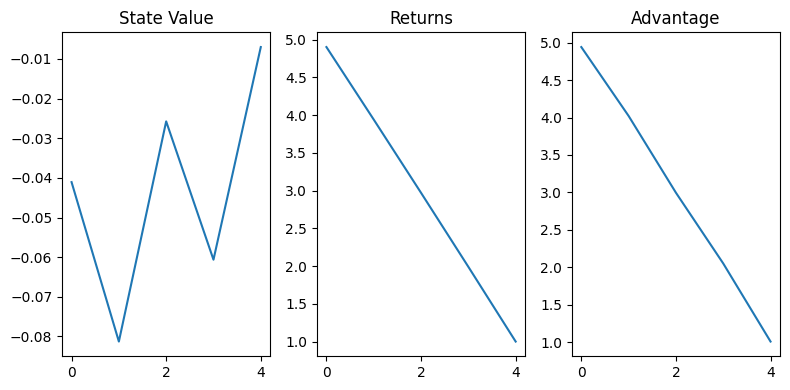

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(8, 4))

state_value = state_value.cpu().detach()
last_rollout_returns = last_rollout_returns.cpu().detach()
advantage = advantage.cpu().detach()

# Í∞Å subplotÏóê Îç∞Ïù¥ÌÑ∞ Í∑∏Î¶¨Í∏∞
axs[0].plot(np.array(state_value))
axs[0].set_title('State Value')

axs[1].plot(np.array(last_rollout_returns))
axs[1].set_title('Returns')

axs[2].plot(np.array(advantage))
axs[2].set_title('Advantage')


# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.tight_layout()
plt.show()

2) Advantage Í∞íÏùÑ ÌôúÏö©Ìïú Î™©Ï†ÅÌï®Ïàò ÏµúÏ†ÅÌôî

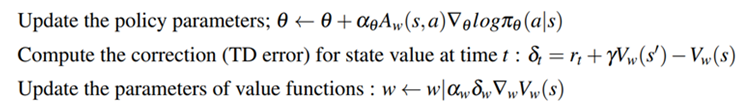

Îã®, Ïù¥ Îïå td error($\delta_{t})$ ÎåÄÏã† $ùê¥_ùë°^{(ùëõ)} (ùë†,ùëé) = \sum\limits_{l=0}^{n-1} \gamma^l ùëü(ùë†_{t+l}, a_{t+l}) + \gamma^{n}V(ùë†_{t+n}) - V(ùë†_t)$ ÏÇ¨Ïö©

`gather`Ìï®ÏàòÎäî log_probÎì§ Ï§ë ÏÑ†ÌÉùÎêú actionÏóê ÎåÄÌïú log_probÎßå ÏÑ†ÌÉù


In [20]:
ex_log_prob = torch.tensor(
    [[-1.2, -0.8, -1.0],
     [-1.1, -0.9, -0.7],
     [-1.4, -0.6, -1.2]])
ex_actions = torch.tensor([0, 2, 1]).unsqueeze(1)

gather_log_prob = ex_log_prob.gather(1, ex_actions)
print(gather_log_prob)

tensor([[-1.2000],
        [-0.7000],
        [-0.6000]])


In [21]:
################################## ÏΩîÎìú ÏûëÏÑ± ###################################

# ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÌôúÏö©Ìïú ÏÉÅÌÉú logit ÏòàÏ∏°
logits, state_value = actor_critic.forward(states)
logits = logits.view(-1, actor_critic.act_dim)

# logitÏùÑ ÌôúÏö©ÌïòÏó¨ log probability Í≥ÑÏÇ∞
log_prob = F.log_softmax(logits, dim=1)
actions = actions.view(-1, 1)

# ÌòÑÏû¨ actionÏóê ÎåÄÌïú log_prob ÌöçÎìù
log_prob_act = log_prob.gather(1, actions)

################################################################################


In [22]:
advantage = torch.Tensor(advantage).unsqueeze(1).to(DEVICE)

################################## ÏΩîÎìú ÏûëÏÑ± ###################################

# ActorÍ∞Ä Advantage Í∞íÏùÑ ÏµúÎåÄÌôîÌïòÎèÑÎ°ù ÌïôÏäµ, Ïò§Ï∞® Ìï®Ïàò Î™Ö : 'loss_policy'
loss_policy = - (advantage.detach() * log_prob_act).mean()

# CriticÏù¥ Advantage Í∞íÏùÑ ÏòàÏ∏°ÌïòÎèÑÎ°ù ÌïôÏäµ, Ïò§Ï∞® Ìï®Ïàò Î™Ö : 'loss_critic'
loss_critic = 0.5 * advantage.pow(2.).mean()

################################################################################

loss = loss_policy + loss_critic

print(f'loss_policy : {loss_policy}')
print(f'loss_critic : {loss_critic}')
print(f'loss : {loss}')

loss_policy : 2.0636067390441895
loss_critic : 5.479240417480469
loss : 7.542847156524658


ÎÑ§Ìä∏ÏõåÌÅ¨ ÏóÖÎç∞Ïù¥Ìä∏ Ìï®ÏàòÌôî(`a2c_update`)
 - ÏûÖÎ†•Î≥ÄÏàò : Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨, RolloutÎêú Îç∞Ïù¥ÌÑ∞Îì§
 - Ï∂úÎ†• Í∞í : Í≥ÑÏÇ∞Îêú loss Í∞í
 - Ïó≠Ìï† : RolloutÎêú Îç∞Ïù¥ÌÑ∞Îì§ÏùÑ return Î∞è advantage Í∞íÏùÑ Í≥ÑÏÇ∞ÌïòÍ≥†, Í∞ÅÍ∞ÅÏùò Î™©Ï†ÅÌï®ÏàòÏóê ÎßûÎäî Ïò§Ï∞®Ìï®Ïàò Í≥ÑÏÇ∞

In [23]:
def a2c_update(net, done, current_state, current_action, next_states, rewards):

    ################################## ÏΩîÎìú ÏûëÏÑ± ###################################

    # Trajectory Îã®ÏúÑÏùò Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±
    states = torch.tensor(current_state, dtype=torch.float).to(DEVICE)
    actions = torch.tensor(current_action, dtype=torch.int64).to(DEVICE)
    next_states = torch.tensor(next_states, dtype=torch.float).to(DEVICE)

    # Î∞òÌôò Í∞í Í≥ÑÏÇ∞
    returns = get_returns(net, next_states, rewards, done)

    # ÌòÑÏû¨ ÏÉÅÌÉúÏóê Îî∞Îùº ÌñâÎèô ÏÑ†ÌÉù
    logits, state_value = net.forward(states)
    logits = logits.view(-1, net.act_dim)
    log_prob = F.log_softmax(logits, dim=1)
    actions = actions.view(-1, 1)
    log_prob_act = log_prob.gather(1, actions)

    returns = torch.Tensor(returns).unsqueeze(1).to(DEVICE)

    # Advantage Ìï®Ïàò Í≥ÑÏÇ∞
    # r_t + V(s_(t+1)) - V(s_t)
    advantage = returns - state_value

    # Actor ÌñâÎèôÏùò Advantage ÏµúÎåÄÌôî
    loss_policy = - (advantage.detach() * log_prob_act).mean()

    # CriticÏù¥ advantageÌï®ÏàòÎ•º ÏòàÏ∏°ÌïòÎèÑÎ°ù ÌïôÏäµ
    loss_critic = 0.5 * advantage.pow(2.).mean()

    ################################################################################

    loss = loss_policy + loss_critic

    return loss

## Ï†ÑÏ≤¥ ÌïôÏäµ ÏΩîÎìú

In [24]:
env_name = 'CartPole-v1'

env = gym.make(env_name)
obs_dim = env.observation_space.shape[0]
n_action = env.action_space.n

lr = 1e-3
gamma = 0.99
max_epi_num = 1000

actor_critic = Actor_Critic(obs_dim, n_action).to(DEVICE)
optimizer = optim.Adam(actor_critic.parameters(), lr=lr)

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [25]:
env_name = 'CartPole-v1'

env = gym.make(env_name)
obs_dim = env.observation_space.shape[0]
n_action = env.action_space.n

lr = 1e-3
gamma = 0.99

actor_critic = Actor_Critic(obs_dim, n_action).to(DEVICE)
optimizer = optim.Adam(actor_critic.parameters(), lr=lr)

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [26]:
# ÏµúÎåÄ Episode ÌöüÏàò Í≤∞Ï†ï
max_epi_num = 1000
# Episode ÎÇ¥ ÏµúÎåÄ timestep ÌöüÏàò Í≤∞Ï†ï
max_time_step = 10
time_step = 1

# ÏóêÌîºÏÜåÎìú ÎèôÏïà ÌöçÎìùÌïú reward Í∞í ÎπÑÍµê
a2c_results_reward = []
advantages = []
actor_losses = []
critic_losses = []
total_losses = []

for i in range(max_epi_num):

    done = False
    obs = env.reset()
    total_reward = 0

    current_state = []
    current_action = []
    next_states = []
    rewards = []


    while not done:

        ################################## ÏΩîÎìú ÏûëÏÑ± ###################################

        # action_decideÌï®ÏàòÎ•º ÌôúÏö©Ìïú ÌñâÎèô Í≤∞Ï†ï Î∞è ÌôòÍ≤ΩÍ≥º ÍµêÎ•ò
        action = action_decide(actor_critic, obs)
        next_obs, reward, done, info = env.step(action)
        total_reward += reward

        # Í∞Å ÏÉÅÌÉú, ÌñâÎèô, Î≥¥ÏÉÅ Î∞∞Ïó¥Ïóê rollout ÏÉòÌîå Ï†ÄÏû•
        current_state.append(obs)
        current_action.append(action)
        next_states.append(next_obs)
        rewards.append(reward)

        ################################################################################

        if time_step % max_time_step == 0 or done:
            # Trajectory Îã®ÏúÑÏùò Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±
            states = torch.tensor(current_state, dtype=torch.float).to(DEVICE)
            actions = torch.tensor(current_action, dtype=torch.int64).to(DEVICE)
            next_states = torch.tensor(next_states, dtype=torch.float).to(DEVICE)

            ################################## ÏΩîÎìú ÏûëÏÑ± ###################################

            # Î∞òÌôò Í∞í Í≥ÑÏÇ∞
            _, v_next = actor_critic.forward(next_states[-1])

            # ÌòÑÏû¨ TrajectoryÏùò ÎßàÏßÄÎßâ ÏÉÅÌÉúÏóê ÎåÄÌïú Í∞í ÏòàÏ∏°, ÏóêÌîºÏÜåÎìúÍ∞Ä ÎÅùÎÇ¨Îã§Î©¥ Îã§Ïùå ÏÉÅÌÉúÏùò Î∞òÌôò Í∞íÏùÑ Ï†ÑÌååÌïòÏßÄ ÏïäÏùå
            R = v_next * (1 - int(done))

            returns = []

            # rewardsÏùò Ïó≠ÏàúÎ∂ÄÌÑ∞ Î∞òÌôò Í∞í Í≥ÑÏÇ∞
            for reward in rewards[::-1]:
                R = reward + gamma * R
                returns.append(R)
            returns.reverse()
            ################################################################################

            returns = torch.Tensor(returns).unsqueeze(1).to(DEVICE)

            ################################## ÏΩîÎìú ÏûëÏÑ± ###################################

            # ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÌôúÏö©Ìïú ÏÉÅÌÉú logit ÏòàÏ∏°
            logits, state_value = actor_critic.forward(states)
            logits = logits.view(-1, actor_critic.act_dim)

            # logitÏùÑ ÌôúÏö©ÌïòÏó¨ log probability Í≥ÑÏÇ∞
            log_prob = F.log_softmax(logits, dim=1)
            actions = actions.view(-1, 1)
            log_prob_act = log_prob.gather(1, actions)
            ################################################################################

            ################################## ÏΩîÎìú ÏûëÏÑ± ###################################

            # Advantage Ìï®Ïàò Í≥ÑÏÇ∞
            # r_t + V(s_(t+1)) - V(s_t)
            advantage = returns - state_value

            # Actor ÌñâÎèôÏùò Advantage ÏµúÎåÄÌôî
            loss_policy = - (advantage.detach() * log_prob_act).mean()

            # CriticÏù¥ advantageÌï®ÏàòÎ•º ÏòàÏ∏°ÌïòÎèÑÎ°ù ÌïôÏäµ
            loss_critic = 0.5 * advantage.pow(2.).mean()

            ################################################################################

            loss = loss_policy + loss_critic

            actor_losses.append(loss_policy.item())
            critic_losses.append(loss_critic.item())
            total_losses.append(loss.item())
            advantages += (list(advantage.detach().cpu().numpy().squeeze(-1)))

            # Ïò§Ï∞® Ìï®ÏàòÎ•º ÌôúÏö©Ìïú ÏµúÏ†ÅÌôî
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            ################################################################################

            current_state = []
            current_action = []
            next_states = []
            rewards = []

        time_step += 1
        obs = next_obs

    if i % 100 == 0 and i != 0:
        print(f'epsiode: {i}, score: {np.mean(a2c_results_reward[-10:])}')
    a2c_results_reward.append(total_reward)

env.close()

epsiode: 100, score: 47.7
epsiode: 200, score: 139.3
epsiode: 300, score: 214.9
epsiode: 400, score: 306.7
epsiode: 500, score: 112.8
epsiode: 600, score: 119.2
epsiode: 700, score: 124.5
epsiode: 800, score: 311.6
epsiode: 900, score: 214.5


## Íµ¨ÌòÑ Í≤∞Í≥º Î∂ÑÏÑù

### ÎÑ§Ìä∏ÏõåÌÅ¨ loss ÎπÑÍµê

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(8, 4))

# Í∞Å subplotÏóê Îç∞Ïù¥ÌÑ∞ Í∑∏Î¶¨Í∏∞
axs[0].plot(np.array(actor_losses))
axs[0].set_title('Actor Loss')

axs[1].plot(np.array(critic_losses))
axs[1].set_title('Critic Loss')

axs[2].plot(np.array(total_losses))
axs[2].set_title('Total Loss')


# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.tight_layout()
plt.show()

### ÎßàÏßÄÎßâ ÏóêÌîºÏÜåÎìúÏùò Advantage Í∞í Í¥ÄÏ∏°

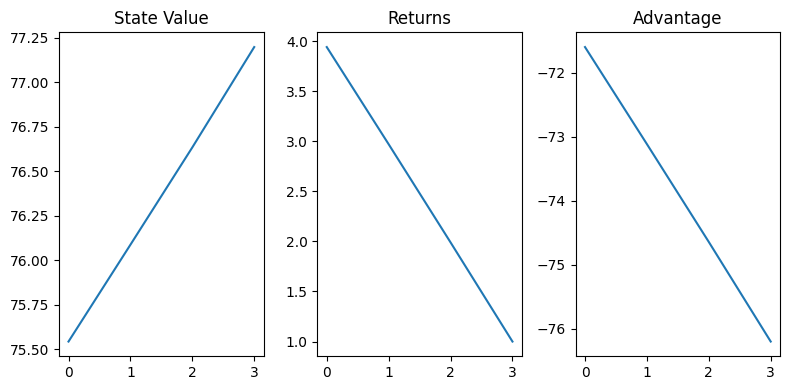

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(8, 4))

state_value = state_value.cpu().detach()
returns = returns.cpu().detach()
advantage = advantage.cpu().detach()

# Í∞Å subplotÏóê Îç∞Ïù¥ÌÑ∞ Í∑∏Î¶¨Í∏∞
axs[0].plot(np.array(state_value))
axs[0].set_title('State Value')

axs[1].plot(np.array(returns))
axs[1].set_title('Returns')

axs[2].plot(np.array(advantage))
axs[2].set_title('Advantage')


# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.tight_layout()
plt.show()

### Advantage Í∞íÏùò Ìñ•ÏÉÅÎ•† Í¥ÄÏ∏°

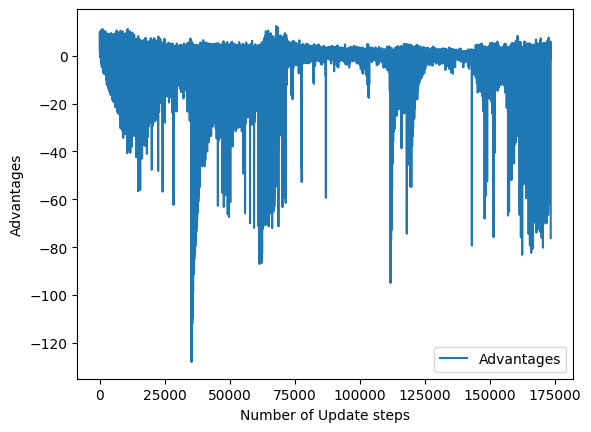

In [29]:
plt.xlabel("Number of Update steps")
plt.ylabel("Advantages")
plt.plot(advantages, label='Advantages')
plt.legend()
plt.show()
plt.close()

### A2C ÏïåÍ≥†Î¶¨Ï¶òÏùò ÏÑ±Îä• Ìñ•ÏÉÅ

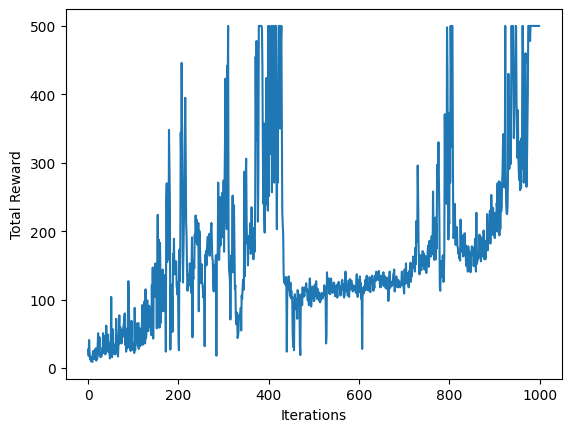

In [30]:
plt.xlabel("Iterations")
plt.ylabel("Total Reward")
plt.plot(np.array(a2c_results_reward))
plt.savefig(f'./A2C performance.png')
np.save(f'./A2C_performance.npy', np.array(a2c_results_reward))

### REINFORCE ÏïåÍ≥†Î¶¨Ï¶òÍ≥º ÎπÑÍµê

Í∏∞Ï°¥ A2C ÏïåÍ≥†Î¶¨Ï¶òÍ≥ºÏùò Ï∞®Ïù¥Ï†ê


1.   EpisodeÏùò Ï†ÑÏ≤¥ stepÏùÑ ÌôúÏö©Ìï¥ÏÑú return Í≥ÑÏÇ∞

2.   Advantage Í∞íÏù¥ ÏïÑÎãå Return Í∞íÏùÑ ÌôúÏö©ÌïòÏó¨ ÏóÖÎç∞Ïù¥Ìä∏



In [31]:
env_name = 'CartPole-v1'

env = gym.make(env_name)
obs_dim = env.observation_space.shape[0]
n_action = env.action_space.n

lr = 1e-3
gamma = 0.99
hidden_layers = [128, 128]

actor_critic = Actor_Critic(obs_dim, n_action).to(DEVICE)
optimizer = optim.Adam(actor_critic.parameters(), lr=lr)

In [32]:
def reinf_update(net, done, current_state, current_action, next_states, rewards):

    # Trajectory Îã®ÏúÑÏùò Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±
    states = torch.tensor(current_state, dtype=torch.float).to(DEVICE)
    actions = torch.tensor(current_action, dtype=torch.int64).to(DEVICE)
    next_states = torch.tensor(next_states, dtype=torch.float).to(DEVICE)

    # Î∞òÌôò Í∞í Í≥ÑÏÇ∞
    returns = get_returns(net, next_states, rewards, done)

    # ÌòÑÏû¨ ÏÉÅÌÉúÏóê Îî∞Îùº ÌñâÎèô ÏÑ†ÌÉù
    logits, state_value = net.forward(states)
    logits = logits.view(-1, net.act_dim)
    log_prob = F.log_softmax(logits, dim=1)
    actions = actions.view(-1, 1)
    log_prob_act = log_prob.gather(1, actions)

    returns = torch.Tensor(returns).unsqueeze(1).to(DEVICE)

    ################################## ÏΩîÎìú ÏûëÏÑ± ###################################

    # Actor ÌñâÎèôÏùò Returns ÏµúÎåÄÌôî
    loss_policy = - (returns.detach() * log_prob_act).mean()

    # CriticÏù¥ returnÌï®ÏàòÎ•º ÏòàÏ∏°ÌïòÎèÑÎ°ù ÌïôÏäµ
    loss_critic = 0.5 * returns.pow(2.).mean()

    ################################################################################

    loss = loss_policy + loss_critic

    return loss

In [33]:
# ÏµúÎåÄ Episode ÌöüÏàò Í≤∞Ï†ï
max_epi_num = 1000

# ÏóêÌîºÏÜåÎìú ÎèôÏïà ÌöçÎìùÌïú reward Í∞í ÎπÑÍµê
reinf_results_reward = []
losses = []

for i in range(max_epi_num):

    done = False
    obs = env.reset()
    total_reward = 0

    current_state = []
    current_action = []
    next_states = []
    rewards = []


    while not done:
        # ÌñâÎèô Í≤∞Ï†ïÏùÑ ÌÜµÌï¥ ÌôòÍ≤ΩÍ≥º ÍµêÎ•ò
        action = action_decide(actor_critic, obs)
        next_obs, reward, done, info = env.step(action)
        total_reward += reward

        current_state.append(obs)
        current_action.append(action)
        next_states.append(next_obs)
        rewards.append(reward)

        if done:

            # Trajectory Îã®ÏúÑÏùò Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±
            states = torch.tensor(current_state, dtype=torch.float).to(DEVICE)
            actions = torch.tensor(current_action, dtype=torch.int64).to(DEVICE)
            next_states = torch.tensor(next_states, dtype=torch.float).to(DEVICE)

            # Î∞òÌôò Í∞í Í≥ÑÏÇ∞
            _, v_next = actor_critic.forward(next_states[-1])

            R = v_next * (1 - int(done))

            returns = []

            # rewardsÏùò Ïó≠ÏàúÎ∂ÄÌÑ∞ Î∞òÌôò Í∞í Í≥ÑÏÇ∞
            for reward in rewards[::-1]:
                R = reward + gamma * R
                returns.append(R)
            returns.reverse()

            # ÌòÑÏû¨ ÏÉÅÌÉúÏóê Îî∞Îùº ÌñâÎèô ÏÑ†ÌÉù
            logits, state_value = actor_critic.forward(states)
            logits = logits.view(-1, actor_critic.act_dim)
            log_prob = F.log_softmax(logits, dim=1)
            actions = actions.view(-1, 1)
            log_prob_act = log_prob.gather(1, actions)

            returns = torch.Tensor(returns).unsqueeze(1).to(DEVICE)

            ################################## ÏΩîÎìú ÏûëÏÑ± ###################################

            # Actor ÌñâÎèôÏùò Returns ÏµúÎåÄÌôî
            loss_policy = - (returns.detach() * log_prob_act).mean()

            # CriticÏù¥ returnÌï®ÏàòÎ•º ÏòàÏ∏°ÌïòÎèÑÎ°ù ÌïôÏäµ
            loss_critic = 0.5 * returns.pow(2.).mean()

            ################################################################################

            loss = loss_policy + loss_critic

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            current_state = []
            current_action = []
            next_states = []
            rewards = []

        obs = next_obs

    if i % 100 == 0 and i != 0:
        print(f'epsiode: {i}, score: {np.mean(reinf_results_reward[-10:])}')
    reinf_results_reward.append(total_reward)

env.close()

epsiode: 100, score: 27.3
epsiode: 200, score: 22.3
epsiode: 300, score: 49.0
epsiode: 400, score: 78.2
epsiode: 500, score: 83.8
epsiode: 600, score: 150.0
epsiode: 700, score: 221.8
epsiode: 800, score: 155.7
epsiode: 900, score: 121.3


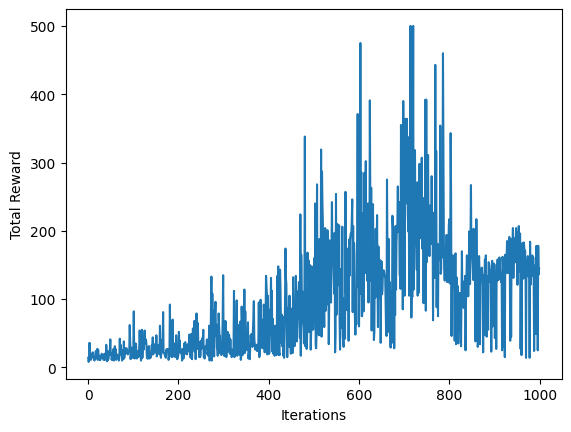

In [34]:
plt.xlabel("Iterations")
plt.ylabel("Total Reward")
plt.plot(np.array(reinf_results_reward))
plt.savefig(f'./REINFORCE performance.png')
np.save(f'./REINFORCE_performance.npy', np.array(reinf_results_reward))

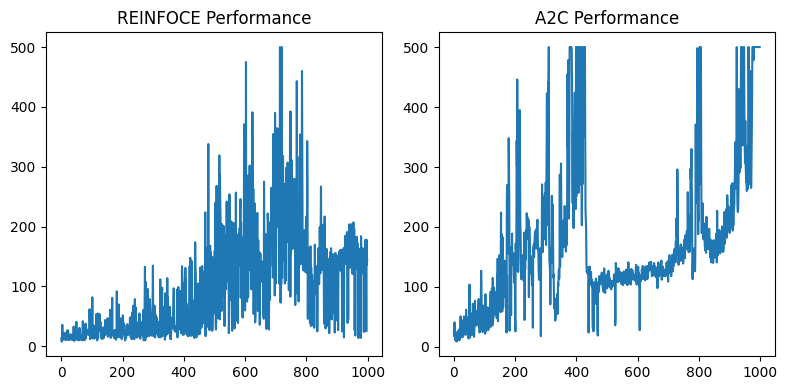

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Í∞Å subplotÏóê Îç∞Ïù¥ÌÑ∞ Í∑∏Î¶¨Í∏∞
axs[0].plot(np.array(reinf_results_reward))
axs[0].set_title('REINFOCE Performance')

axs[1].plot(np.array(a2c_results_reward))
axs[1].set_title('A2C Performance')

# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.tight_layout()
plt.show()